In [5]:
#=============================================================================================================
# Imports
#=============================================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import multidim
from cosmic.sample.sampler import independent

In [6]:
#=============================================================================================================
# Standard flags/parameters dictionary for evolution of all binaries
#=============================================================================================================


BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 
           'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 2.5, 'beta': -1.0, 'tflag': 1, 
           'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 
           'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,
                             2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0],
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'zsun' : 0.017}


In [7]:
#=============================================================================================================
# Q 1.2: single binary 
#=============================================================================================================

## Parameters:
# m1 : ZAMS mass of the primary star in solar masses
# m2 : ZAMS mass of the secondary star in solar masses
# porb : initial orbital period in days
# ecc : initial eccentricity
# tphysf : total evolution time of the binary in Myr
# kstar1 : initial primary stellar type, following the BSE convention
# kstar2 : initial secondary stellar type, following the BSE convention
# metallicity : metallicity fraction (e.g. solar metallicity=0.02)

#=============================================================================================================
# WD + WD:

## Initial conditions:
m1 = 4
m2 = 6
a = 0.5
porb = 365*np.sqrt(a**3/(m1+m2))  # try different orbital periods
ecc = 0.04
tphysf = 13700.0
kstar1 = 1
kstar2 = 1
met = 0.002

## Create the initial binary table:
single_binary_WD = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, 
                                                   porb=porb, ecc=ecc, 
                                                   tphysf=tphysf,
                                                   kstar1=kstar1,
                                                   kstar2=kstar2,
                                                   metallicity=met)

## Evolve the binary using the initial binary table and our standard BSEDict:
bpp_WD, bcm_WD, initC_WD, kick_WD = Evolve.evolve(initialbinarytable=single_binary_WD, BSEDict=BSEDict)

In [9]:
t_sec_rem = bpp_WD.reset_index().tphys.iloc[-2]  # time of formation of the second WD
initC_plot = initC_WD.copy()
initC_plot['dtp'] = 0.005  # change the timestep to get a more detailed evolution
bpp_plot, bcm_plot, initC_plot, kick_plot = Evolve.evolve(initialbinarytable=initC_plot)  # re-evolve the binary with new timestep
bcm_plot = bcm_plot.loc[bcm_plot.tphys <= t_sec_rem]  # choose all data until second remnant formation for plotting

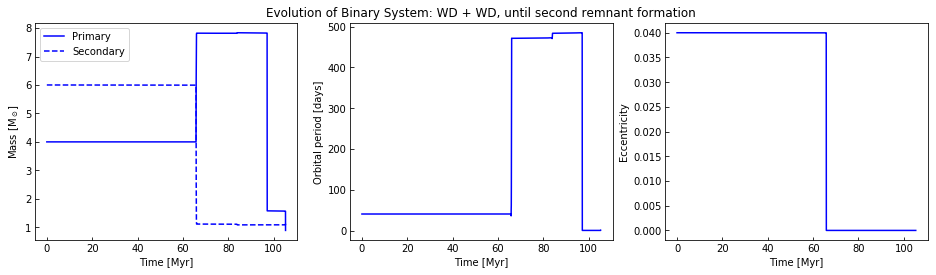

In [10]:
## Plotting:
t_WD = bcm_plot.tphys  # time array
m1_WD = bcm_plot.mass_1  # evolution of mass 1
m2_WD = bcm_plot.mass_2  # evolution of mass 2
porb_WD = bcm_plot.porb  # evolution of orbital period
ecc_WD = bcm_plot.ecc  # evolution of eccentricity

fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(t_WD, m1_WD, label='Primary', color='b')
ax[0].plot(t_WD, m2_WD, label='Secondary', linestyle='--', color='b')
ax[0].set_xlabel('Time [Myr]')
ax[0].set_ylabel('Mass [M$_\odot$]')
ax[0].legend()
ax[0].tick_params(direction='in')
ax[1].plot(t_WD, porb_WD, color='b')
ax[1].set_xlabel('Time [Myr]')
ax[1].set_ylabel('Orbital period [days]')
ax[1].tick_params(direction='in')
ax[2].plot(t_WD, ecc_WD, color='b')
ax[2].set_xlabel('Time [Myr]')
ax[2].set_ylabel('Eccentricity')
ax[2].tick_params(direction='in')
ax[1].set_title('Evolution of Binary System: WD + WD, until second remnant formation')
plt.savefig('WD_bin_3panel.pdf')
plt.show(block=False)


In [102]:
#=============================================================================================================
# NS + NS:

# We made a change to the speed of the kick the NS receives at birth (sigma) in BSEDict to avoid 
# disrupting the binary system before the NS form

BSEDict_NS = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 
           'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 2.5, 'beta': -1.0, 'tflag': 1, 
           'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 
           'sigma': 0.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,
                             2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0],
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'zsun' : 0.017}

## Initial Conditions:
m1 = 16
m2 = 15
porb = 400
ecc = 0.5
tphysf = 13700.0
kstar1 = 1
kstar2 = 1
met = 0.02

## Create the initial binary table:
single_binary_NS = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, 
                                                   porb=porb, ecc=ecc, 
                                                   tphysf=tphysf,
                                                   kstar1=kstar1,
                                                   kstar2=kstar2,
                                                   metallicity=met)

## Evolve the binary using the initial binary table and new BSEDict:
bpp_NS, bcm_NS, initC_NS, kick_NS = Evolve.evolve(initialbinarytable=single_binary_NS, BSEDict=BSEDict_NS)

In [103]:
## Re-evolve with new timestep:
t_sec_rem = bpp_NS.reset_index().tphys.iloc[-4]
initC_plot = initC_NS.copy()
initC_plot['dtp'] = 0.005
bpp_plot, bcm_plot, initC_plot, kick_plot = Evolve.evolve(initialbinarytable=initC_plot)
bcm_plot = bcm_plot.loc[bcm_plot.tphys <= np.round(t_sec_rem, 1)]
bcm_plot = bcm_plot.reset_index()

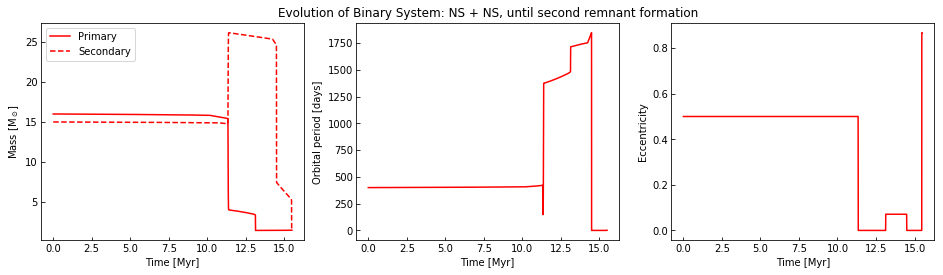

In [104]:
## Plotting:
t_NS = bcm_plot.tphys
m1_NS = bcm_plot.mass_1
m2_NS = bcm_plot.mass_2
porb_NS = bcm_plot.porb
ecc_NS = bcm_plot.ecc

fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(t_NS, m1_NS, label='Primary', color='r')
ax[0].plot(t_NS, m2_NS, label='Secondary', linestyle='--', color='r')
ax[0].set_xlabel('Time [Myr]')
ax[0].set_ylabel('Mass [M$_\odot$]')
ax[0].legend()
ax[0].tick_params(direction='in')
ax[1].set_xlabel('Time [Myr]')
ax[1].set_ylabel('Orbital period [days]')
ax[1].tick_params(direction='in')
ax[1].plot(t_NS, porb_NS, color='r')
ax[2].plot(t_NS, ecc_NS, color='r')
ax[2].set_xlabel('Time [Myr]')
ax[2].set_ylabel('Eccentricity')
ax[2].tick_params(direction='in')
ax[1].set_title('Evolution of Binary System: NS + NS, until second remnant formation')
plt.savefig('NS_bin_3panel.pdf')
plt.show(block=False)

In [105]:
#=============================================================================================================
# BH + BH:

## Initial Conditions:
m1 = 80
m2 = 85
a = 0.5
porb = 365*np.sqrt(a**3/(m1+m2))
ecc = 0.01
tphysf = 13700.0
kstar1 = 1
kstar2 = 1
met = 0.002

## Create the initial binary table:
single_binary_BH = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, 
                                                   porb=porb, ecc=ecc, 
                                                   tphysf=tphysf,
                                                   kstar1=kstar1,
                                                   kstar2=kstar2,
                                                   metallicity=met)

## Evolve the binary using the initial binary table and standard BSEDict:
bpp_BH, bcm_BH, initC_BH, kick_BH = Evolve.evolve(initialbinarytable=single_binary_BH, BSEDict=BSEDict)

In [106]:
## Re-evolve:
t_sec_rem = bpp_BH.reset_index().tphys.iloc[-2]
initC_plot = initC_BH.copy()
initC_plot['dtp'] = 0.05
bpp_plot, bcm_plot, initC_plot, kick_plot = Evolve.evolve(initialbinarytable=initC_plot)
bcm_plot = bcm_plot.loc[bcm_plot.tphys <= t_sec_rem]

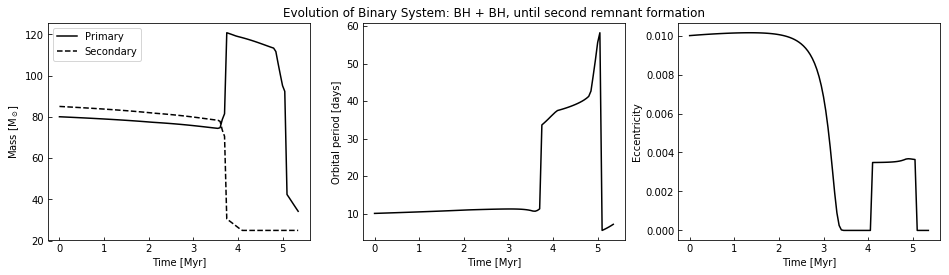

In [107]:
## Plotting:
t_BH = bcm_plot.tphys
m1_BH = bcm_plot.mass_1
m2_BH = bcm_plot.mass_2
porb_BH = bcm_plot.porb
ecc_BH = bcm_plot.ecc

fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(t_BH, m1_BH, label='Primary', color='k')
ax[0].plot(t_BH, m2_BH, label='Secondary', linestyle='--', color='k')
ax[0].set_xlabel('Time [Myr]')
ax[0].set_ylabel('Mass [M$_\odot$]')
ax[0].legend()
ax[0].tick_params(direction='in')
ax[1].plot(t_BH, porb_BH, color='k')
ax[1].set_xlabel('Time [Myr]')
ax[1].set_ylabel('Orbital period [days]')
ax[1].tick_params(direction='in')
ax[2].plot(t_BH, ecc_BH, color='k')
ax[2].set_xlabel('Time [Myr]')
ax[2].set_ylabel('Eccentricity')
ax[2].tick_params(direction='in')
ax[1].set_title('Evolution of Binary System: BH + BH, until second remnant formation')
plt.savefig('BH_bin_3panel.pdf')
plt.show(block=False)



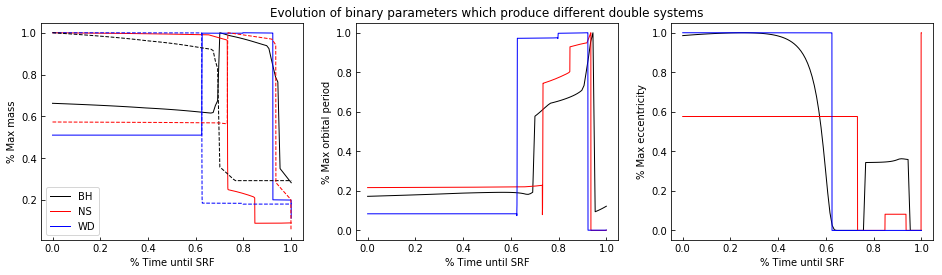

In [17]:
## Plotting all:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(t_BH/t_BH.max(), m1_BH/m1_BH.max(), label='BH', color='k', linewidth=1.0)
ax[0].plot(t_NS/t_NS.max(), m1_NS/m1_NS.max(), label='NS', color='r', linewidth=1.0)
ax[0].plot(t_WD/t_WD.max(), m1_WD/m1_WD.max(), label='WD', color='b', linewidth=1.0)
ax[0].legend()
ax[0].plot(t_WD/t_WD.max(), m2_WD/m2_WD.max(), linestyle='--', color='b', linewidth=1.0)
ax[0].plot(t_BH/t_BH.max(), m2_BH/m2_BH.max(), linestyle='--', color='k', linewidth=1.0)
ax[0].plot(t_NS/t_NS.max(), m2_NS/m2_NS.max(), linestyle='--', color='r', linewidth=1.0)
ax[0].set_xlabel('% Time until SRF')
ax[0].set_ylabel('% Max mass')
ax[0].tick_params(direction='in')
ax[1].plot(t_BH/t_BH.max(), porb_BH/porb_BH.max(), color='k', linewidth=1.0)
ax[1].plot(t_NS/t_NS.max(), porb_NS/porb_NS.max(), color='r', linewidth=1.0)
ax[1].plot(t_WD/t_WD.max(), porb_WD/porb_WD.max(), color='b', linewidth=1.0)
ax[1].set_xlabel('% Time until SRF')
ax[1].set_ylabel('% Max orbital period')
ax[1].tick_params(direction='in')
ax[2].plot(t_BH/t_BH.max(), ecc_BH/ecc_BH.max(), color='k', linewidth=1.0)
ax[2].plot(t_NS/t_NS.max(), ecc_NS/ecc_NS.max(), color='r', linewidth=1.0)
ax[2].plot(t_WD/t_WD.max(), ecc_WD/ecc_WD.max(), color='b', linewidth=1.0)
ax[2].set_xlabel('% Time until SRF')
ax[2].set_ylabel('% Max eccentricity')
ax[2].tick_params(direction='in')
ax[1].set_title('Evolution of binary parameters which produce different double systems')
plt.savefig('All_3panel.pdf')
plt.show(block=False)

In [18]:
#=============================================================================================================
# Q 1.3: binary grid
#=============================================================================================================

n_grid = 10  # size of grid
porb_i = 50.0  # initial orbital period
ecc_i = 0.5  # initial eccentricity
tphysf_i = 13700.0 # duration of evolution
met_i = 0.002  # metallicity


# The process for creating these grids is the same as for the single binary, only now 
# we feed in arrays of input parameters. For this question all the parameters are uniform
# except for the secondary mass, which is a range of mass ratios related to the primary
# mass. We do this process 10 times for primary masses ranging from 10 to 100 solar masses.

#=======================================================================================
# M1 = 10 solar masses:

m1_i = 10.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_10 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_10, bcm_10, initC_10, kick_10 = Evolve.evolve(initialbinarytable=binary_grid_10, 
                                                  BSEDict=BSEDict) 

psr10 = []  # create list of orbital periods at time of second remnant formation
mr10 = []  # create list of mass ratio
for i in range(10):
    bpp_10_i = bpp_10.loc[bpp_10.index == i].copy()
    psr10.append(bpp_10_i.porb.iloc[-2])
    m2 = bpp_10_i.mass_2.iloc[0]
    mr10.append(m2 / m1_i)

#=======================================================================================
# M1 = 20 solar masses:

m1_i = 20.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_20 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_20, bcm_20, initC_20, kick_20 = Evolve.evolve(initialbinarytable=binary_grid_20,
                                                  BSEDict=BSEDict) 

psr20 = []
mr20 = []
for i in range(10):
    bpp_20_i = bpp_20.loc[bpp_20.index == i].copy()
    psr20.append(bpp_20_i.porb.iloc[-2])
    m2 = bpp_20_i.mass_2.iloc[0]
    mr20.append(m2 / m1_i)

#=======================================================================================
# M1 = 30 solar masses:

m1_i = 30.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_30 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_30, bcm_30, initC_30, kick_30 = Evolve.evolve(initialbinarytable=binary_grid_30,
                                                  BSEDict=BSEDict) 

psr30 = []
mr30 = []
for i in range(10):
    bpp_30_i = bpp_30.loc[bpp_30.index == i].copy()
    psr30.append(bpp_30_i.porb.iloc[-2])
    m2 = bpp_30_i.mass_2.iloc[0]
    mr30.append(m2 / m1_i)

#=======================================================================================
# M1 = 40 solar masses:

m1_i = 40.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_40 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_40, bcm_40, initC_40, kick_40 = Evolve.evolve(initialbinarytable=binary_grid_40,
                                                  BSEDict=BSEDict) 

psr40 = []
mr40 = []
for i in range(10):
    bpp_40_i = bpp_40.loc[bpp_40.index == i].copy()
    psr40.append(bpp_40_i.porb.iloc[-2])
    m2 = bpp_40_i.mass_2.iloc[0]
    mr40.append(m2 / m1_i)

#=======================================================================================
# M1 = 50 solar masses:

m1_i = 50.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_50 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_50, bcm_50, initC_50, kick_50 = Evolve.evolve(initialbinarytable=binary_grid_50,
                                                  BSEDict=BSEDict) 

psr50 = []
mr50 = []
for i in range(10):
    bpp_50_i = bpp_50.loc[bpp_50.index == i].copy()
    psr50.append(bpp_50_i.porb.iloc[-2])
    m2 = bpp_50_i.mass_2.iloc[0]
    mr50.append(m2 / m1_i)

#=======================================================================================
# M1 = 60 solar masses:

m1_i = 60.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_60 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_60, bcm_60, initC_60, kick_60 = Evolve.evolve(initialbinarytable=binary_grid_60,
                                                  BSEDict=BSEDict) 

psr60 = []
mr60 = []
for i in range(10):
    bpp_60_i = bpp_60.loc[bpp_60.index == i].copy()
    psr60.append(bpp_60_i.porb.iloc[-2])
    m2 = bpp_60_i.mass_2.iloc[0]
    mr60.append(m2 / m1_i)

#=======================================================================================
# M1 = 70 solar masses:

m1_i = 70.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_70 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_70, bcm_70, initC_70, kick_70 = Evolve.evolve(initialbinarytable=binary_grid_70,
                                                  BSEDict=BSEDict) 

psr70 = []
mr70 = []
for i in range(10):
    bpp_70_i = bpp_70.loc[bpp_70.index == i].copy()
    psr70.append(bpp_70_i.porb.iloc[-2])
    m2 = bpp_70_i.mass_2.iloc[0]
    mr70.append(m2 / m1_i)

#========================================================================================
# M1 = 80 solar masses:

m1_i = 80.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_80 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_80, bcm_80, initC_80, kick_80 = Evolve.evolve(initialbinarytable=binary_grid_80,
                                                  BSEDict=BSEDict) 

psr80 = []
mr80 = []
for i in range(10):
    bpp_80_i = bpp_80.loc[bpp_80.index == i].copy()
    psr80.append(bpp_80_i.porb.iloc[-2])
    m2 = bpp_80_i.mass_2.iloc[0]
    mr80.append(m2 / m1_i)

#========================================================================================
# M1 = 90 solar masses:

m1_i = 90.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_90 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_90, bcm_90, initC_90, kick_90 = Evolve.evolve(initialbinarytable=binary_grid_90,
                                                  BSEDict=BSEDict) 

psr90 = []
mr90 = []
for i in range(10):
    bpp_90_i = bpp_90.loc[bpp_90.index == i].copy()
    psr90.append(bpp_90_i.porb.iloc[-2])
    m2 = bpp_90_i.mass_2.iloc[0]
    mr90.append(m2 / m1_i)

#========================================================================================
# M1 = 100 solar masses:

m1_i = 100.0
m2_i = np.linspace(0.1, 1.0, 10) * m1_i

binary_grid_100 = InitialBinaryTable.InitialBinaries(m1=np.ones(n_grid)*m1_i, m2=m2_i, 
                                                     porb=np.ones(n_grid)*porb_i, 
                                                     ecc=np.ones(n_grid)*ecc_i, 
                                                     tphysf=np.ones(n_grid)*tphysf_i, 
                                                     kstar1=np.ones(n_grid), 
                                                     kstar2=np.ones(n_grid), 
                                                     metallicity=np.ones(n_grid)*met_i)
    
bpp_100, bcm_100, initC_100, kick_100 = Evolve.evolve(initialbinarytable=binary_grid_100,
                                                      BSEDict=BSEDict) 

initC_plot100 = initC_100.copy()
initC_plot100['dtp'] = 0.005
bpp_plot, bcm_plot, initC_plot, kick_plot = Evolve.evolve(initialbinarytable=initC_plot100)

psr100 = []
mr100 = []
for i in range(10):
    bpp_100_i = bpp_100.loc[bpp_100.index == i].copy()
    psr100.append(bpp_100_i.porb.iloc[-2])
    m2 = bpp_100_i.mass_2.iloc[0]
    mr100.append(m2 / m1_i)


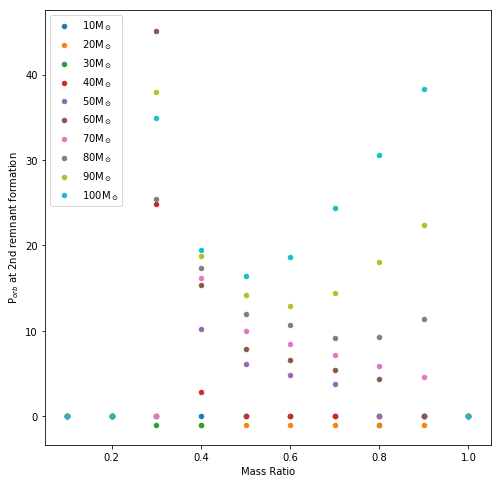

In [19]:
## Plotting all orbital periods as a function of mass ratio:

plt.figure(figsize=(8,8))
plt.scatter(mr10, psr10, label='10M$_\odot$', s=20)
plt.scatter(mr20, psr20, label='20M$_\odot$', s=20)
plt.scatter(mr30, psr30, label='30M$_\odot$', s=20)
plt.scatter(mr40, psr40, label='40M$_\odot$', s=20)
plt.scatter(mr50, psr50, label='50M$_\odot$', s=20)
plt.scatter(mr60, psr60, label='60M$_\odot$', s=20)
plt.scatter(mr70, psr70, label='70M$_\odot$', s=20)
plt.scatter(mr80, psr80, label='80M$_\odot$', s=20)
plt.scatter(mr90, psr90, label='90M$_\odot$', s=20)
plt.scatter(mr100, psr100, label='100M$_\odot$', s=20)
plt.legend()
plt.xlabel('Mass Ratio')
plt.ylabel('P$_{orb}$ at 2nd remnant formation')
plt.savefig('Period_Grid_All.png')
plt.savefig('Period_Grid_All.pdf')
plt.show()

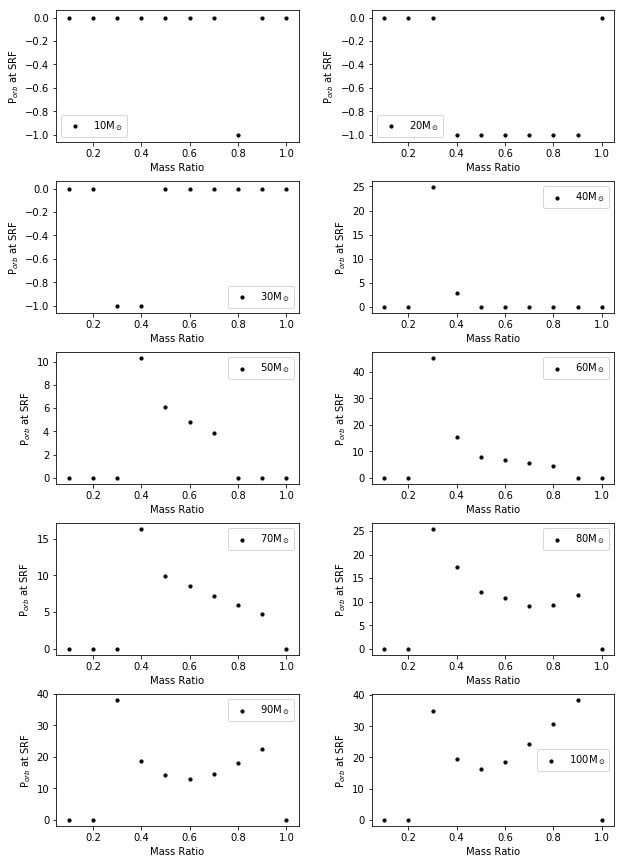

In [20]:
## Plotting individual orbital periods as a function of mass ratio:

fig, ax = plt.subplots(5, 2, figsize=(10,15))

ax[0,0].scatter(mr10, psr10, label='10M$_\odot$', s=10, color='k')
ax[0,0].legend()
ax[0,0].set_xlabel('Mass Ratio')
ax[0,0].set_ylabel('P$_{orb}$ at SRF')

ax[0,1].scatter(mr20, psr20, label='20M$_\odot$', s=10, color='k')
ax[0,1].legend()
ax[0,1].set_xlabel('Mass Ratio')
ax[0,1].set_ylabel('P$_{orb}$ at SRF')

ax[1,0].scatter(mr30, psr30, label='30M$_\odot$', s=10, color='k')
ax[1,0].legend()
ax[1,0].set_xlabel('Mass Ratio')
ax[1,0].set_ylabel('P$_{orb}$ at SRF')

ax[1,1].scatter(mr40, psr40, label='40M$_\odot$', s=10, color='k')
ax[1,1].legend()
ax[1,1].set_xlabel('Mass Ratio')
ax[1,1].set_ylabel('P$_{orb}$ at SRF')

ax[2,0].scatter(mr50, psr50, label='50M$_\odot$', s=10, color='k')
ax[2,0].legend()
ax[2,0].set_xlabel('Mass Ratio')
ax[2,0].set_ylabel('P$_{orb}$ at SRF')

ax[2,1].scatter(mr60, psr60, label='60M$_\odot$', s=10, color='k')
ax[2,1].legend()
ax[2,1].set_xlabel('Mass Ratio')
ax[2,1].set_ylabel('P$_{orb}$ at SRF')

ax[3,0].scatter(mr70, psr70, label='70M$_\odot$', s=10, color='k')
ax[3,0].legend()
ax[3,0].set_xlabel('Mass Ratio')
ax[3,0].set_ylabel('P$_{orb}$ at SRF')

ax[3,1].scatter(mr80, psr80, label='80M$_\odot$', s=10, color='k')
ax[3,1].legend()
ax[3,1].set_xlabel('Mass Ratio')
ax[3,1].set_ylabel('P$_{orb}$ at SRF')

ax[4,0].scatter(mr90, psr90, label='90M$_\odot$', s=10, color='k')
ax[4,0].legend()
ax[4,0].set_xlabel('Mass Ratio')
ax[4,0].set_ylabel('P$_{orb}$ at SRF')

ax[4,1].scatter(mr100, psr100, label='100M$_\odot$', s=10, color='k')
ax[4,1].legend()
ax[4,1].set_xlabel('Mass Ratio')
ax[4,1].set_ylabel('P$_{orb}$ at SRF')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig('Period_Grid_Panels.png')
plt.savefig('Period_Grid_Panels.pdf')
plt.show(block=False)

In [21]:
#=============================================================================================================
# Q 2: Double WD populations 
#=============================================================================================================

G = 6.67e-11  # gravitational constant
c = 3e8  # speed of light

## Functions:
def a(t, m1, m2, a_0):
    '''
    inputs: arrays of time, primary and secondary masses, and 
            initial separation
    outputs: returns semi-major axis of binary at time t
    '''
    m1 = m1 * 1.989e30
    m2 = m2 * 1.989e30
    a_0 = a_0 * 696340e3
    beta = 64 / 5 * G ** 3 * m1 * m2 * (m1 + m2) / c ** 5
    arg = a_0 ** 4 - 4 * beta * t
    a_t = arg ** (1 / 4) / 696340e3
    return a_t

def merger_time(m1, m2, a_0):
    '''
    inputs: primary and secondary masses, and initial separation
    outputs: returns the time it takes a binary to merge from the 
            time of second remnant formation
    '''
    m1 = m1 * 1.989e30
    m2 = m2 * 1.989e30
    a_0 = a_0 * 696340e3
    beta = 64 / 5 * G ** 3 * m1 * m2 * (m1 + m2) / c ** 5
    T = a_0 ** 4 / 4 / beta
    sec_Myr = 60 * 60 * 24 * 365 * 10 ** 6
    return T / sec_Myr


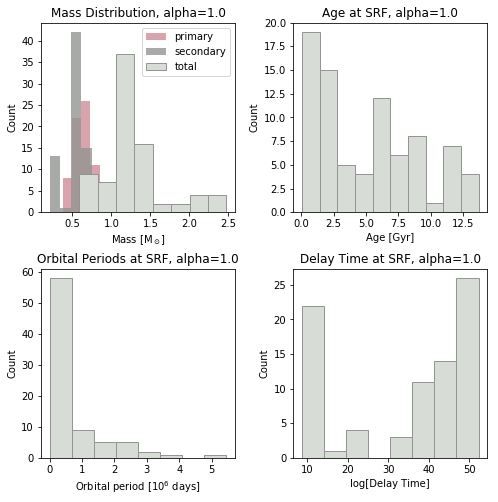

In [79]:
# We evolved the binary system separately on the CITA cluster, and saved the evolved
# parameter DataFrames to be uploaded here. We simulated 1000 binary systems and evolved
# them. Next we can select out those which form WD + WD binaries by selecting for specific
# stellar types. We then can extract the orbital period, age, and masses at the time of
# second remnant formation and plot these in a histogram. Finally we calculate the delay
# times of each of these, and plot those as well.

bpp = pd.read_hdf('datafile.hdf', key='bpp')
bpp_reset = bpp.copy().reset_index()
bpp_last = bpp_reset.loc[bpp_reset.tphys == 13700.0]
i_WD = bpp_last.loc[(bpp_last.kstar_1 > 9)&(bpp_last.kstar_1 < 13)&(bpp_last.kstar_2 > 9)&
                    (bpp_last.kstar_2 < 13)].index
WD = bpp.iloc[i_WD-1]
i_WD_bpp = WD.index
bpp_WD = bpp.loc[i_WD_bpp]
Mass = WD.mass_1 + WD.mass_2
mass1 = WD.mass_1
mass2 = WD.mass_2
porbs = WD.porb
a_0 = WD.sep
ZAMS_age = WD.tphys
age = WD.tphys

fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].hist(WD.mass_1, bins=8, color='xkcd:dark rose',alpha=0.5, label='primary')
ax[0,0].hist(WD.mass_2, bins=8, color='xkcd:grey', alpha=0.8, label='secondary')
ax[0,0].hist(Mass, bins=8, color='xkcd:light grey', edgecolor='xkcd:grey', label='total')
ax[0,0].legend()
ax[0,0].set_xlabel('Mass [M$_\odot$]')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Mass Distribution, alpha=1.0')

ax[0,1].hist(age/1000, bins=10, color='xkcd:light grey', edgecolor='xkcd:grey')
ax[0,1].set_xlabel('Age [Gyr]')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Age at SRF, alpha=1.0')

ax[1,0].hist(porbs/1000000, bins=8, color='xkcd:light grey', edgecolor='xkcd:grey')
ax[1,0].set_xlabel('Orbital period [$10^6$ days]')
ax[1,0].set_ylabel('Count')
ax[1,0].set_title('Orbital Periods at SRF, alpha=1.0')

merger_times = merger_time(mass1, mass2, a_0)
delay_times = merger_times + ZAMS_age

ax[1,1].hist(np.log(delay_times), bins=8, color='xkcd:light grey', edgecolor='xkcd:grey')
ax[1,1].set_xlabel('log[Delay Time]')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title('Delay Time at SRF, alpha=1.0')

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig('WDBins_a1.png')
plt.savefig('WDBins_a1.pdf')
plt.show(block=False)


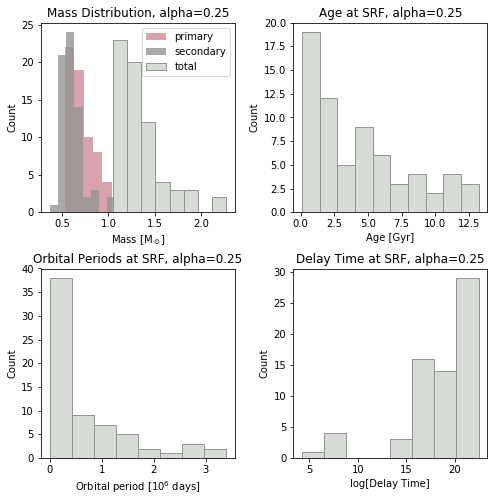

In [116]:
# Repeat the process of the previous cell, but a new BSEDict was used which changed the 
# parameter "alpha" from 1.0 to 0.25.

bpp2 = pd.read_hdf('datafile2.hdf', key='bpp')
bpp2_reset = bpp2.copy().reset_index()
bpp2_last = bpp2_reset.loc[bpp2_reset.tphys == 13700.0]
i_WD2 = bpp2_last.loc[(bpp2_last.kstar_1 > 9)&(bpp2_last.kstar_1 < 13)&(bpp2_last.kstar_2 > 9)&
                    (bpp2_last.kstar_2 < 13)].index
WD2 = bpp2.iloc[i_WD2-1]
i_WD2_bpp = WD2.index
bpp_WD2 = bpp2.loc[i_WD2_bpp]
Mass2 = WD2.mass_1 + WD2.mass_2
mass12 = WD2.mass_1
mass22 = WD2.mass_2
porbs2 = WD2.porb
a_02 = WD2.sep
ZAMS_age2 = WD2.tphys
age2 = WD2.tphys
merger_times2 = merger_time(mass12, mass22, a_02)
delay_times2 = merger_times2 + ZAMS_age2

fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].hist(mass12, bins=8, color='xkcd:dark rose', alpha=0.5, label='primary')
ax[0,0].hist(mass22, bins=8, color='xkcd:grey', alpha=0.8, label='secondary')
ax[0,0].hist(Mass2, bins=8, color='xkcd:light grey', label='total', edgecolor='xkcd:grey')
ax[0,0].legend()
ax[0,0].set_xlabel('Mass [M$_\odot$]')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Mass Distribution, alpha=0.25')

ax[0,1].hist(age2/1000, bins=10, color='xkcd:light grey', edgecolor='xkcd:grey')
ax[0,1].set_xlabel('Age [Gyr]')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Age at SRF, alpha=0.25')

ax[1,0].hist(porbs2/1000000, bins=8, color='xkcd:light grey', edgecolor='xkcd:grey')
ax[1,0].set_xlabel('Orbital period [$10^6$ days]')
ax[1,0].set_ylabel('Count')
ax[1,0].set_title('Orbital Periods at SRF, alpha=0.25')

ax[1,1].hist(np.log10(delay_times2), bins=8, color='xkcd:light grey', edgecolor='xkcd:grey')
ax[1,1].set_xlabel('log[Delay Time]')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title('Delay Time at SRF, alpha=0.25')

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig('WDBins_a025.png')
plt.savefig('WDBins_a025.pdf')